In [1]:
import matplotlib.pyplot as plt

def plot_action_cruve(file_name):
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))                  
    
    plt.plot(action_values)

In [2]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.plot(Rewards)

### 目前设定  

#### 奖励函数  
```
reward=-min(abs(self.target_z-pose.position.z),5)
        
        if timestamp > self.takeoff_limit:
            if pose.position.z < self.target_z:
                done=True
        
        if pose.position.z==self.target_z:
            reward+=100*(self.target_hit)**2+100
            self.target_hit+=1
            
        if pose.position.z > self.height_limit:
            reward-=700
            done=True
        if timestamp > self.max_duration:
            done=True
```

#### DDPG模型    
* soft update 参数 0.001
* gamma 0.99
* Memory   按优先级存储/取样
   * 容量 1000
   * 一次取样量 100
   
* Actor  
   * 优化器 Adam: lr=0.0001  
   * 网络结构 2 hidden-layers(400-300)
   * 激活函数 tanh
* Critic
   * 优化器 Adadelta(默认)
   * l2正则化(10-5)
   * 网络结构 state:（400-300）+ actions:300


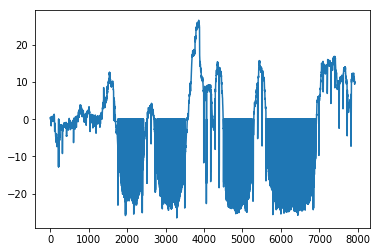

In [11]:
plot_action_cruve("actions_01.txt")

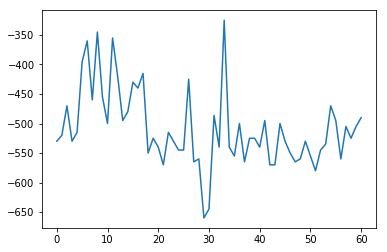

In [12]:
plot_rewards("rewards_01.txt")

* Actor激活函数改回relu

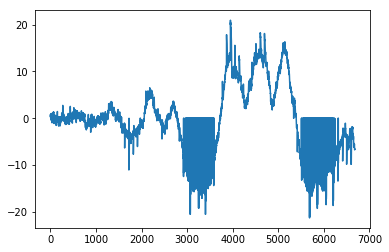

In [13]:
plot_action_cruve("actions_02.txt")

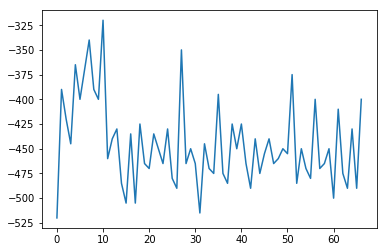

In [14]:
plot_rewards("rewards_02.txt")

#### 奖励函数调整  
考虑飞行方向奖励/惩罚  
* version-1

```
"""高度偏离惩罚"""
        reward=-min(abs(self.target_z-pose.position.z),5)

        """高度目标奖励"""
        if pose.position.z==self.target_z:
            reward+=100*(self.target_hit)**2
            self.target_hit+=1
        
        """阶段结束条件"""
        if timestamp > self.takeoff_limit:
            if pose.position.z < self.target_z:
                done=True
        if pose.position.z > self.height_limit:
            reward-=1000
            done=True
        if timestamp > self.max_duration:
            done=True

        """飞行方向奖励/惩罚"""
        if timestamp-self.last_time > 0.2:
            if pose.position.z < self.target_z:
                if pose.orientation.z < 0:
                    reward-=2
            else:
                if pose.orientation.z > 0:
                    reward-=500
                elif pose.orientation.z < 0:
                    reward+=10
   
```

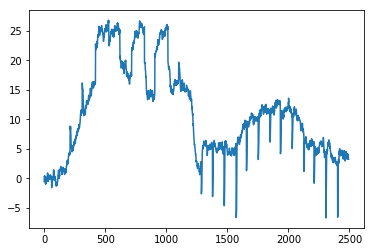

In [67]:
plot_action_cruve("actions_03.txt")

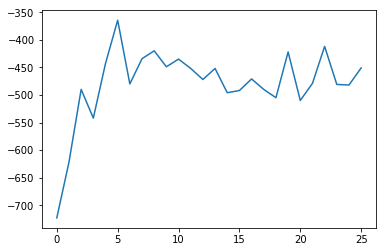

In [68]:
plot_rewards("rewards_03.txt")

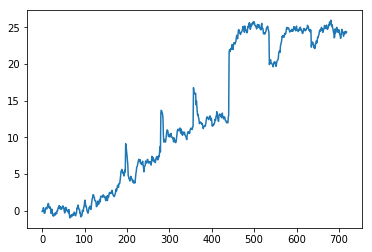

In [79]:
plot_action_cruve("actions_04.txt")

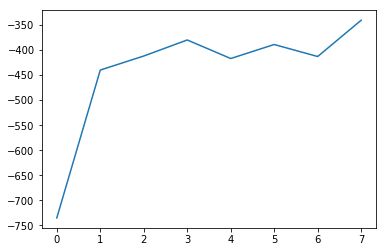

In [80]:
plot_rewards("rewards_04.txt")

* version-2  
```
 reward=0
        """飞行方向奖励/惩罚"""
        if pose.position.z < self.target_z:
            if pose.orientation.z < 0:
                reward=-1
        else:
            if pose.orientation.z > 0:
                reward=-100
            elif pose.orientation.z < 0:
                reward=10   

        """高度目标奖励"""
        if pose.position.z==self.target_z:
            reward+=100*(self.target_hit)**2
            self.target_hit+=1
        
        """阶段结束条件"""
        if timestamp > self.takeoff_limit:
            if pose.position.z < self.target_z:
                done=True
        if pose.position.z > self.height_limit:
            reward-=1000
            done=True
        if timestamp > self.max_duration:
            done=True
```

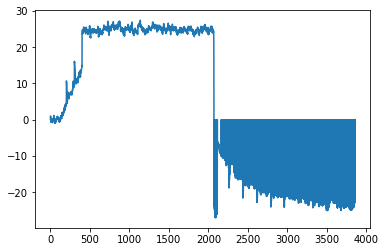

In [83]:
plot_action_cruve("actions_05.txt")

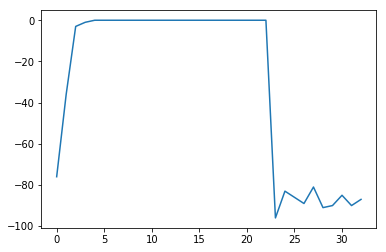

In [84]:
plot_rewards("rewards_05.txt")